In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Metrics in Classification
#### `Cofusion Matrix`
A confusion matrix is a 2D table used to compare the actual labels with the predicted labels of a model, helping us understand **where the model makes mistakes**. It is commonly used in classification tasks.

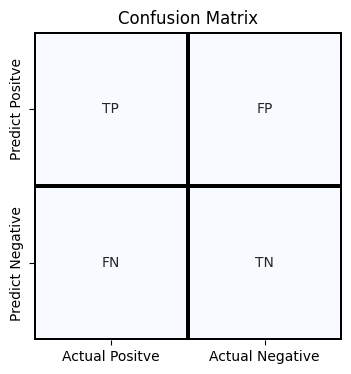

In [17]:
cm = np.array([[1, 1],
               [1, 1]])

annot = np.array([["TP", "FP"], # [TP, FP]
                ["FN", "TN"]]) # [FN, TN]

labels = ["Positve", "Negative"]

df_cm = pd.DataFrame(cm, index=[f"Predict {label}" for label in labels],
                        columns=[f"Actual {label}" for label in labels])

plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=annot, fmt="s", cmap="Blues", cbar=False, linewidths=1.5, linecolor="black", square=True)
plt.title("Confusion Matrix")
plt.show();

Meaning of each cell:
  - **TP (True Positive)**: Positive sample → correctly predicted as Positive.
  - **TN (True Negative)**: Negative sample → correctly predicted as Negative.
  - **FP (False Positive, Type I Error)**: Negative sample misclassified as Positive.
  - **FN (False Negative, Type II Error)**: Positive sample misclassified as Negative.

Some observations about the confusion matrix:
  - The **Actual Positive** column represents the number of actual positive samples, while the **Actual Negative** column represents the number of actual negative samples.
  - Increasing or decreasing one component of the confusion matrix only affects the values within the same column where that component belongs; the other column remains unchanged.

#### `Type I and Type II Errors`
- **Type I Error (False Positive – FP)**: The actual class is Negative, but the model predicts Positive.
- **Type II Error (False Negative – FN)**: The actual class is Positive, but the model predicts Negative.

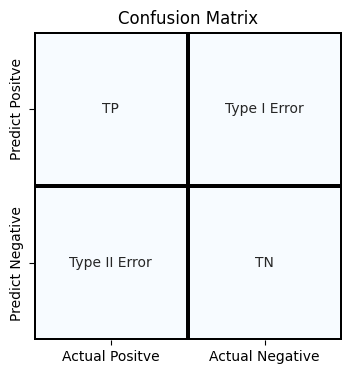

In [18]:
cm = np.array([[1, 1],
               [1, 1]])

annot = np.array([["TP", "Type I Error"], # [TP, FP]
                ["Type II Error", "TN"]]) # [FN, TN]

labels = ["Positve", "Negative"]

df_cm = pd.DataFrame(cm, index=[f"Predict {label}" for label in labels],
                        columns=[f"Actual {label}" for label in labels])

plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=annot, fmt="s", cmap="Blues", cbar=False, linewidths=1.5, linecolor="black", square=True)
plt.title("Confusion Matrix")
plt.show();

Meaning:
  - Type I Error (FP – False Alarm): **A false alarm**. For example, in medical testing: the model predicts “disease present” when the patient is actually healthy.
  - Type II Error (FN – Missed Detection): **A missed detection**. For example, in medical testing: the model predicts “no disease” when the patient is actually sick.

Trade-off between **Type I and Type II Errors**:
  - In many models, reducing Type I errors often increases Type II errors, and vice versa.
  - This trade-off depends on the **classification threshold**.

  Example:
  - **Low threshold**: The model tends to predict more “Positive” cases → fewer FN (fewer misses), but more FP (false alarms).
  - **High threshold**: The model becomes stricter → fewer FP, but more FN (more misses).

  Suppose we have a confusion matrix built from 1000 samples (900 negative and 100 positive).
  - With threshold = 0.5: values ≥ 0.5 are classified as Positive, otherwise Negative.
  - If we **increase the threshold** to 0.8:
    - TP decreases → FN increases.
    - TN increases → FP decreases.
    - (since the total number of positives and negatives in each column is fixed).4
  - If we **decrease the threshold** to 0.3, the opposite happens.

#### `Accuracy`
Definition:
$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

When to use:
  - When the dataset is **Balanced** $\rightarrow$ the number os positive and negative samples is roughly equal.
  - When the **cost of False Positive (FP) and False Negative (FN)** is similar.

Example:
  - Optical Character Recognition (ORC).
  - Image classification tasks (e.g, cat vs dog).
  - Problems where no type of error is prioritized over the other.
  
Advantages:
  - Simple, intuitive, and easy to understand.
  - Reflects the overall performance of the model.
  - Suitable for balanced datasets where FP and FN costs are nearly equal.

Diadvantages:
  - Not suitable for **imbalanced datasets**.
    - Example: A rare disease dataset with 1% positive and 99% negative samples. If the model always predicts "Negative", then Accuracy = 99%. This look good, but the model completely misses all positive cases. A trivial rule like `print("y=0")` can achieve 99% accuracy but has no real value.
  - Dose not differentiate between the costs of FP and FN

#### `Precision`
Definition:
$$
Precision = \frac{TP}{TP + FP}
$$
Precision answers the question: "Out of all the cases the model predicted as Positive, how many are actually correct?".

Note: The denominator of Precision corresponds to the **Positive row** of the predicted values.

Meaning:
  - Precision measures the **reliability** of positive predictions.
  - High Precision $\Rightarrow$ when the model predicts "Positive", it is usually correct.

Example:
  - **Spam email detection**: High Precision ⇒ most emails labeled as “spam” are truly spam (very few important emails are mistakenly flagged).
  - **Healthcare (HIV testing)**: High Precision ⇒ most patients predicted as “HIV positive” are actually infected (few false alarms).

When is it important?
  - When the **cost of False Positives (FP) is high**.
  - In other words, **false alarms must be avoided**.
  
Advantages:
  - Easy to interpret: tells us how trustworthy positive predictions are.
  - Very important in applications where false positives have severe consequences.
  
Diadvantages:
  - Does not take **False Negatives (FN)** into account $\rightarrow$ a model may still miss many positives while maintaining high Precision.
  - High Precision does not imply high Recall $\rightarrow$ the model may only predict positives when very certain, but miss many true positives.

#### `Recall`
Definition:
$$
Recall = \frac{TP}{TP + FN}
$$
Recall answers the question: "Out of all actual Positive cases, how many did model correctly detect?".

Note: The denominator of Recall corresponds to the **Positive column** of the Actual values (the number of actual positive samples).

Meaning:
  - Recall measures the model’s **ability** to capture the positive class.
  - High Recall $\Rightarrow$ the model misses very few positive cases.

When is Recall important?
  - When **False Negatives (FN)** have serious consequences.

Example:
  - Healthcare: Missing a dangerous disease $\rightarrow$ the patient goes untreated and may spread it.
  - Security: Missing a dangerous criminal $\rightarrow$ risk to public safety.
  - Fraud detection: Missing fraudulent transactions $\rightarrow$ real financial losses.
  
Advantages:
  - Ensures that the model does not miss important positive cases.
  - Critical in safety and healthcare-related applications.

Diadvantages:
  - Does not account for False Positives (FP).
  - If optimized only for Recall, the model may predict **all samples as Positive**:
    - Recall = 100% (no positive case is missed).
    - But Precision = very low (most predictions are wrong).
  
Trade-off between Recall and Precision:
  - **Low threshold (lenient model)**: Recall ↑ (fewer FN), but Precision ↓ (more FP).
  - **High threshold (strict model)**: Recall ↓ (more FN), but Precision ↑ (fewer FP).

<img src="Images/Trade-off_Precision_Recall.png" width=600>

#### `F1 Score`
Definition:
$$
F1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

The **F1 score** is the **harmonic mean** of Precision and Recall.

Meaning:
  - High F1-score $\Rightarrow$ the model achieves both high Precision and high Recall.
  - Used when we need a **balance between Precision and Recall**. 
  - Particularly important in **imbalanced datasets**.

Why use the harmonic mean?
  - The harmonic mean **penalizes strongly** when one of the two values is very low.
  - Example:
    - Precision = 1.0, Recall = 0.1 $\rightarrow$ F1 $\approx$ 0.18 (low, despite 100% Pricision).
    - If using the arithmetic mean: (1.0 + 0.1) / 2 = 0.55 $\rightarrow$ misleadingly high.
  - Thus, F1 is high only when both Precision and Recall are good.
  - Note: The value of F1 always lies between Precision and Recall.

When to use F1-score?
  - When dealing with **imbalanced datasets** (e.g., rare diseases, fraud detection).
  - When both FP and FN are important, without prioritizing one over the other.
  - Example:
    - **Spam detection**: Don’t miss spam (Recall), but also don’t classify important emails as spam (Precision).
    - **Recommendation systems**: Recommend as many relevant items as possible (Recall) while minimizing irrelevant suggestions (Precision).
  
Advantages:
  - Provides a balanced metric between Precision and Recall.
  - Very useful in **imbalanced datasets**.

Diadvantages:
  - Does not reflect **True Negatives (TN)** $Rightarrow$ ignores information from the negative class.
  - If the cost of FP and FN is very different $\rightarrow$ F1 is insufficient, and we need the **Fβ-score** (generalized form).

Extension - Fβ-score:
$$
F_{\beta} = (1 + \beta^{2}) \cdot \frac{Precision \cdot Recall}{(\beta^{2} \cdot Precision) + Recall}
$$
  - If β > 1: Recall is prioritized.
  - If β < 1: Precision is prioritized.
  - F1 is a special case when β = 1.

#### `ROC Curve and AUC`
`ROC Curve`
Definition: The **ROC (Receiver Operating Characteristic) curve** is a plot that shows the relationship between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)** as the classification threshold varies.

Formulas:
$$
\begin{cases}
TPR = \frac{TP}{TP + FN} (Recall, Sensitivity) \\
FPR = \frac{FP}{FP + TN} (1 - Specificity)
\end{cases}
$$
  - Each point on the ROC curve corresponds to a different threshold.

<img src="Images/ROC_Curve.png" width=500>

Interpretation:
  - Provides a **comprehensive evaluation** of the model at all thresholds (0 → 1), instead of relying on a single metric like Accuracy, Precision, or Recall at a fixed threshold (e.g., 0.5).
  - Shows how **sensitivity (TPR) and false alarm rate (FPR)** change as the threshold is adjusted.

Ability to distinguish between classes:
  - ROC demonstrates how well the model separates Positive from Negative samples.
  - Example: A **perfect model** always scores Positive higher than Negative $\rightarrow$ ROC curve passes through the top-left corner (TPR=1, FPR=0).

Comparing models:
  - ROC allows **visual comparison** between models.
  - The curve closer to the top-left corner indicates a better model.

Axes meaning:
  - **X-axis (FPR)**: Probability of misclassifying a Negative as Positive.
  - **Y-axis (TPR = Recall)**: Probability of correctly detecting a Positive.
  - **ROC Curve**: Illustrates the trade-off between increasing Recall and the risk of false alarms (FPR) when changing the threshold.

`AUC (Area Under the Curve)`
Definition: AUC is the **area under the ROC curve**, ranging from 0 to 1:
  - 1.0 $\rightarrow$ Perfect model.
  - 0.5 $\rightarrow$ Random guess (no discrimination power).
  - <0.5 $\rightarrow$ Worse than random (can be improved by inverting predictions).

<img src="Images/AUC.png", width=600>

Thus, AUC represents the discriminative power of a model: If we randomly pick one Positive and one Negative sample, AUC is the probability that the model assigns a higher score to the Positive sample.

Interpretation:
  - Measures the model’s ability to distinguish between Positive and Negative samples.
  - Example: AUC = 0.9 ⇒ 90% chance the model gives a higher score to a true Positive than to a true Negative.
  - Evaluates overall model performance across **all thresholds**.
  - Not dependent on a specific threshold (e.g., 0.5).

Model comparison:
  - A higher AUC indicates better separation between classes.

Value interpretation:
  - AUC = 1.0 $\rightarrow$ **Perfect model** (absolute separation).
  - 0.9 $\leq$ AUC < 1.0 $\rightarrow$ **Excellent performance**.
  - 0.7 $\leq$ AUC < 0.9 $\rightarrow$ **Good / Acceptable**.
  - 0.5 $\leq$ AUC < 0.7 $\rightarrow$ **Poor performance**, close to random guess.
  - AUC = 0.5 $\rightarrow$ **No discrimination** (like flipping a coin).
  - AUC < 0.5 $\rightarrow$ **Worse than random** (reversing predictions could improve performance).

Practical example:
  - Task: Build a model to classify whether a patient is HIV Positive or Negative.
  - ROC & AUC are used to:
    - Compare multiple models (e.g., Logistic Regression, Random Forest, Neural Network).
    - Example:
      - Model A: AUC = 0.95 → Excellent, effective at detecting HIV patients.
      - Model B: AUC = 0.75 → Weaker, may miss many cases.
    - ROC curve also helps physicians select the **appropriate threshold**:
      - To minimize missed cases (FN): choose a **low threshold** (prioritize Recall).
      - To minimize false alarms (FP): choose a **high threshold**.